**Regression in Neural Networks**


[Kaggle Competition on SAT and GPA](www.kaggle.com/luddarell/101-simple-linear-regressioncsv)

In [21]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [22]:
# !pip install wget
# import wget

In [23]:
# !unzip /content/drive/MyDrive/Dataset/SAT_GPA/SAT-GPA.zip

In [24]:
import pandas as pd
df=pd.read_csv('/content/data.csv')
df.head(10)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
5,1670,2.91
6,1764,3.00
7,1764,3.00
8,1792,3.01
9,1850,3.01


**Extracting Features and Label**

In [25]:
# Extract features and label
dataset = df.values
X = dataset[:,1]
y = dataset[:,0]

**Defining/Training Model**

In [26]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

In [27]:
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

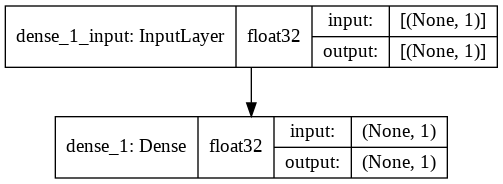

In [28]:
tf.keras.utils.plot_model(model, 'multilayer_model.png', show_shapes=True, show_dtype=True, show_layer_names=True)

In [29]:
model.fit(X, y, epochs = 15)

Epoch 1/15
3/3 [==============================] - 0s 4ms/step - loss: 2303397.2500
Epoch 2/15
3/3 [==============================] - 0s 2ms/step - loss: 438220.7500
Epoch 3/15
3/3 [==============================] - 0s 4ms/step - loss: 91194.7344
Epoch 4/15
3/3 [==============================] - 0s 2ms/step - loss: 26697.3984
Epoch 5/15
3/3 [==============================] - 0s 3ms/step - loss: 14744.8750
Epoch 6/15
3/3 [==============================] - 0s 3ms/step - loss: 12198.1680
Epoch 7/15
3/3 [==============================] - 0s 3ms/step - loss: 11588.5371
Epoch 8/15
3/3 [==============================] - 0s 2ms/step - loss: 11457.6445
Epoch 9/15
3/3 [==============================] - 0s 3ms/step - loss: 11531.5479
Epoch 10/15
3/3 [==============================] - 0s 3ms/step - loss: 11420.6934
Epoch 11/15
3/3 [==============================] - 0s 2ms/step - loss: 11543.6055
Epoch 12/15
3/3 [==============================] - 0s 3ms/step - loss: 11480.9043
Epoch 13/15
3/3 [=====

**Predicting**

In [30]:
result = model.predict([5.0])
print("Expected SAT score for GPA 5.0: {:.0f}".format(result[0][0]))

Expected SAT score for GPA 5.0: 2695


In [31]:
result = model.predict([3.2])
print("Expected SAT score for GPA 3.2: {:.0f}".format(result[0][0]))

Expected SAT score for GPA 3.2: 1781



---

**Wine Quality Analysis**

In [32]:
import pandas as pd
import numpy as np
import requests
import io
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

**Data Preparation**

In [33]:
dataset = pd.read_csv('/content/winequality-white.csv' , sep = ';')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [34]:
x = dataset.drop('quality', axis = 1)
y = dataset['quality']

**Creating Datasets**

In [35]:
# creating training, validation and testing datasets
x_train_1 , x_test , y_train_1 , y_test =train_test_split(x , y , test_size = 0.15 , random_state = 0)
x_train , x_val , y_train , y_val = train_test_split(x_train_1 , y_train_1 , test_size = 0.05 , random_state = 0)

In [36]:
sc_x = StandardScaler()
x_train_new = sc_x.fit_transform(x_train)

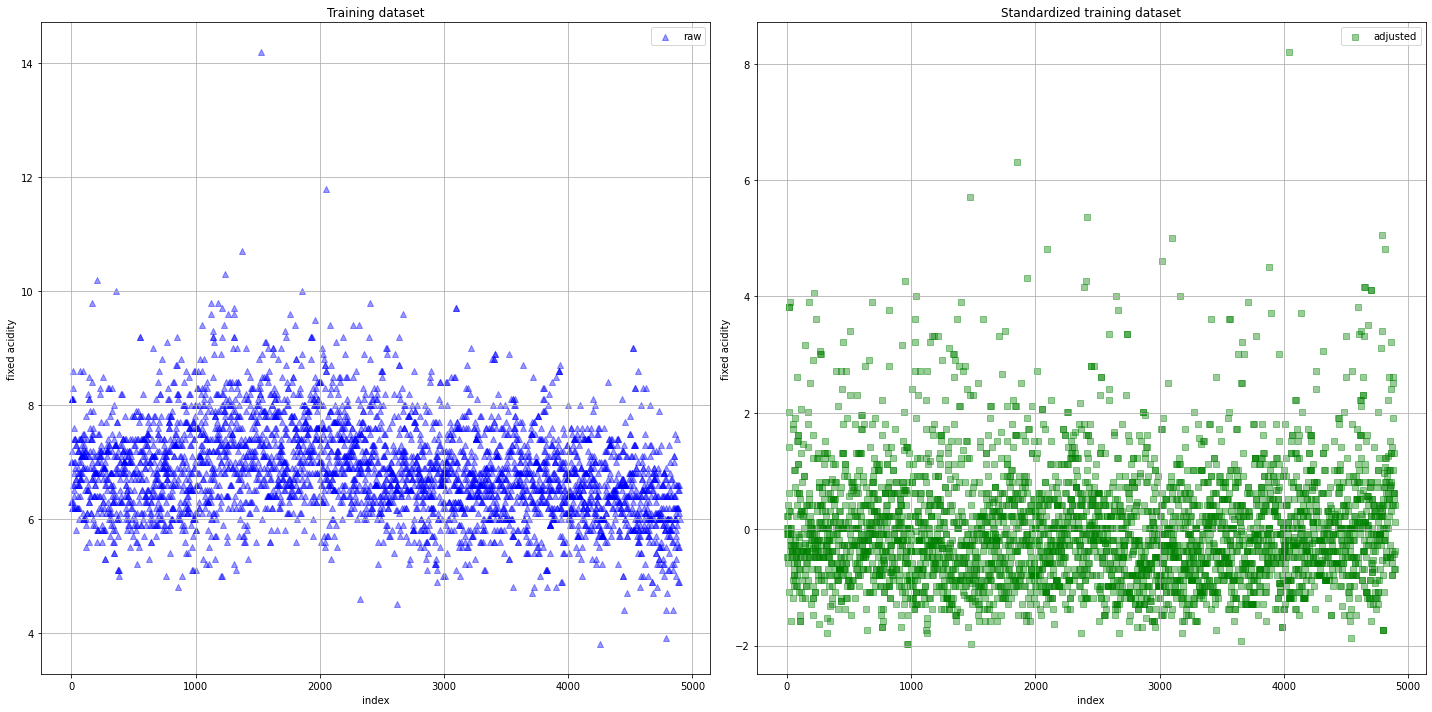

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 10))

ax1.scatter(x_train.index, x_train['fixed acidity'], color = 'blue', label = 'raw', alpha = 0.4,marker = '^')
ax2.scatter(x_train.index, x_train_new[: , 1], color = 'green', label = 'adjusted', alpha = 0.4, marker = 's')

ax1.set_title('Training dataset')
ax2.set_title('Standardized training dataset')

for ax in (ax1, ax2):
  ax.set_xlabel('index')
  ax.set_ylabel('fixed acidity')
  ax.legend(loc ='upper right')
  ax.grid()

plt.tight_layout()
plt.show()

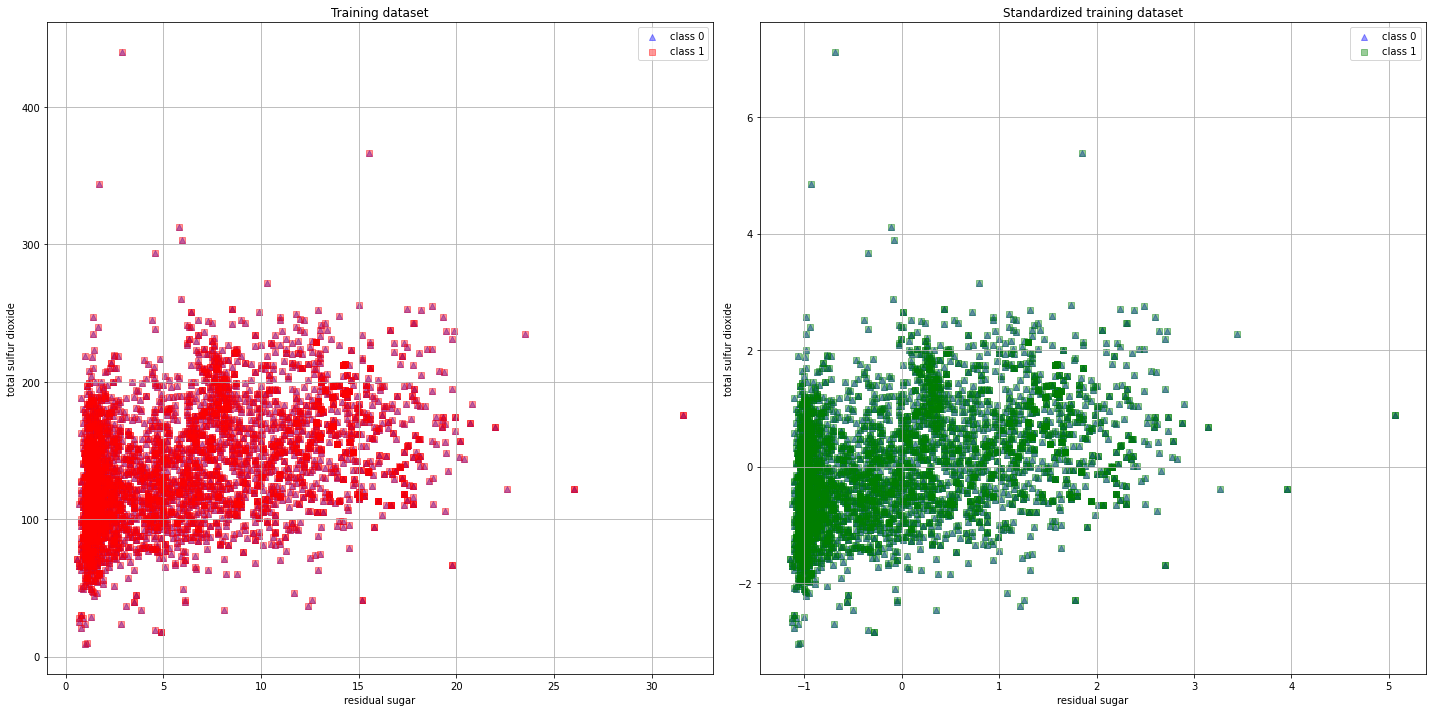

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 10))

for l, c, m in zip(range(0, 2),('blue', 'red'), ('^', 's')):
  ax1.scatter(
      x_train['residual sugar'],
      x_train['total sulfur dioxide'], 
      color = c, 
      label = 'class %s' % l, 
      alpha = 0.4,
      marker = m
  )
for l, c, m in zip(range(0, 2), ('blue', 'green'), ('^', 's')):
  ax2.scatter(x_train_new[: , 3], 
              x_train_new[: , 6],
              color = c,
              label = 'class %s' % l,
              alpha = 0.4,
              marker = m
  )

ax1.set_title('Training dataset')
ax2.set_title('Standardized training dataset')

for ax in (ax1, ax2):
  ax.set_xlabel('residual sugar')
  ax.set_ylabel('total sulfur dioxide')
  ax.legend(loc ='upper right')
  ax.grid()

plt.tight_layout()
plt.show()

In [39]:
x_test_new = sc_x.transform(x_test)
x_val_new = sc_x.transform(x_val)

**Model Building**

*Visualization Function for Metrics*

In [40]:
epoch = 30

def plot_learningCurve(history):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)

  #plotting the mae vs epoch of training set
  plt.plot(epoch_range, history.history['mae'])

  #plotting the val_mae vs epoch of the validation dataset.
  plt.plot(epoch_range, history.history['val_mae'])
  plt.ylim([0, 2])
  plt.title('Model mae')
  plt.ylabel('mae')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc = 'upper right')
  plt.show()

  print("--------------------------------------------------------")
  
  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.ylim([0, 4])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc = 'upper right')
  plt.show()

**Small Model**

In [41]:
small_model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(16 , activation = 'relu' , input_shape = (11 , )),
     tf.keras.layers.Dense(1)
     ]
)

In [42]:
small_model.compile(optimizer = 'adam' , loss = 'mse' , metrics = ['mae'])

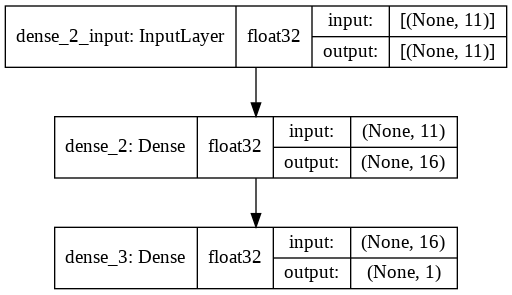

In [43]:
tf.keras.utils.plot_model(small_model, 'multilayer_model.png', show_shapes=True, show_dtype=True, show_layer_names=True)

**Training**

In [44]:
history_small = small_model.fit(
    x_train_new, 
    y_train, 
    batch_size = 32, 
    epochs = 30,
    verbose = 1 , 
    validation_data =(x_val_new , y_val)
)

Epoch 1/30
124/124 [==============================] - 1s 3ms/step - loss: 24.7794 - mae: 4.7730 - val_loss: 17.3929 - val_mae: 3.8823
Epoch 2/30
124/124 [==============================] - 0s 1ms/step - loss: 12.0907 - mae: 3.1323 - val_loss: 7.7310 - val_mae: 2.3859
Epoch 3/30
124/124 [==============================] - 0s 2ms/step - loss: 5.5530 - mae: 1.9828 - val_loss: 4.2594 - val_mae: 1.6977
Epoch 4/30
124/124 [==============================] - 0s 1ms/step - loss: 3.7845 - mae: 1.5773 - val_loss: 3.2926 - val_mae: 1.4925
Epoch 5/30
124/124 [==============================] - 0s 2ms/step - loss: 3.1089 - mae: 1.4114 - val_loss: 2.7239 - val_mae: 1.3495
Epoch 6/30
124/124 [==============================] - 0s 2ms/step - loss: 2.6139 - mae: 1.2878 - val_loss: 2.2964 - val_mae: 1.2451
Epoch 7/30
124/124 [==============================] - 0s 1ms/step - loss: 2.2217 - mae: 1.1821 - val_loss: 1.9424 - val_mae: 1.1462
Epoch 8/30
124/124 [==============================] - 0s 1ms/step - loss:

**Evaluation**

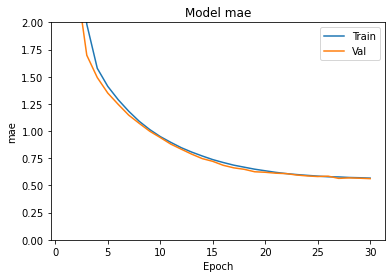

--------------------------------------------------------


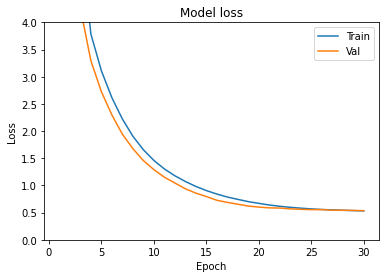

In [45]:
plot_learningCurve(history_small)

In [46]:
s_test_loss , s_test_mae = small_model.evaluate(x_test_new , y_test , batch_size = 32 , verbose = 1)
print("small model test_loss : {}".format(s_test_loss))
print("small model test_mae : {} ".format(s_test_mae))

23/23 [==============================] - 0s 1ms/step - loss: 0.6481 - mae: 0.6307
small model test_loss : 0.6480753421783447
small model test_mae : 0.6306834816932678 


In [47]:
unseen_data = np.array([[6.0 , 0.28 , 0.22 , 12.15 , 0.048 , 42.0 , 163.0 , 0.99570 , 3.20 , 0.46 , 10.1]])
y_small = small_model.predict(sc_x.transform(unseen_data))
print ("Wine quality on unseen data(small model): ", y_small[0][0])

Wine quality on unseen data(small model):  5.6893687


**Medium Model**

In [48]:
medium_model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(64 , activation = 'relu' , input_shape = (11, )),
     tf.keras.layers.Dense(64 , activation = 'relu'), 
     tf.keras.layers.Dense(64 , activation = 'relu'),
     tf.keras.layers.Dense(1)
     ]
)

In [49]:
medium_model.compile(loss = 'mse' , optimizer = 'adam' , metrics = ['mae'])

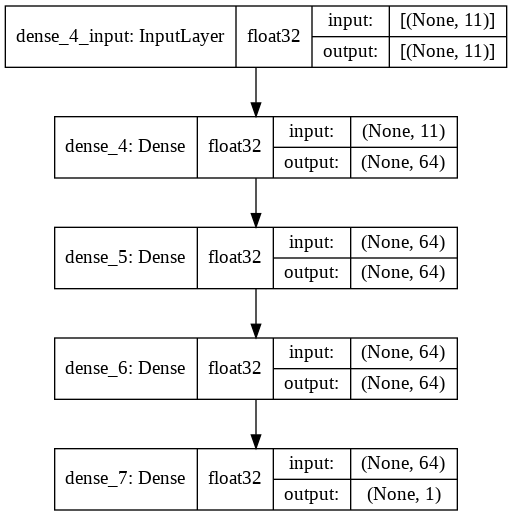

In [50]:
tf.keras.utils.plot_model(medium_model, 'multilayer_model.png', show_shapes=True, show_dtype=True, show_layer_names=True)

In [51]:
history_medium = medium_model.fit(
    x_train_new , 
    y_train , 
    batch_size = 32, 
    epochs = 30, 
    verbose = 1 , 
    validation_data =(x_val_new , y_val)
)

Epoch 1/30
124/124 [==============================] - 1s 3ms/step - loss: 6.5066 - mae: 1.9087 - val_loss: 1.7611 - val_mae: 1.0748
Epoch 2/30
124/124 [==============================] - 0s 2ms/step - loss: 1.5928 - mae: 0.9574 - val_loss: 1.0324 - val_mae: 0.8219
Epoch 3/30
124/124 [==============================] - 0s 2ms/step - loss: 0.9875 - mae: 0.7633 - val_loss: 0.7657 - val_mae: 0.6942
Epoch 4/30
124/124 [==============================] - 0s 2ms/step - loss: 0.7109 - mae: 0.6556 - val_loss: 0.6298 - val_mae: 0.6252
Epoch 5/30
124/124 [==============================] - 0s 2ms/step - loss: 0.5876 - mae: 0.5945 - val_loss: 0.5335 - val_mae: 0.5603
Epoch 6/30
124/124 [==============================] - 0s 2ms/step - loss: 0.5306 - mae: 0.5686 - val_loss: 0.5410 - val_mae: 0.5632
Epoch 7/30
124/124 [==============================] - 0s 2ms/step - loss: 0.4927 - mae: 0.5470 - val_loss: 0.5528 - val_mae: 0.5641
Epoch 8/30
124/124 [==============================] - 0s 2ms/step - loss: 0.

**Model Evaluation**

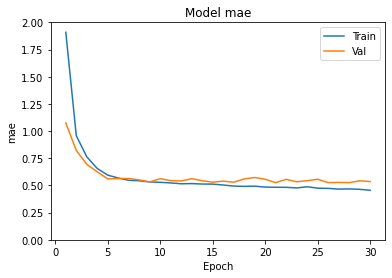

--------------------------------------------------------


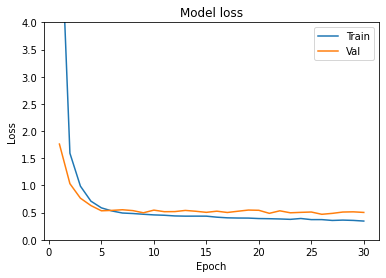

In [52]:
plot_learningCurve(history_medium)

In [53]:
m_test_loss , m_test_mae = medium_model.evaluate(
    x_test_new , 
    y_test ,
    batch_size = 32 , 
    verbose = 1 )

print("medium model test_loss : {}".format(m_test_loss))
print("medium model test_mae : {}".format(m_test_mae))

23/23 [==============================] - 0s 1ms/step - loss: 0.5477 - mae: 0.5621
medium model test_loss : 0.5477368235588074
medium model test_mae : 0.5620557069778442


In [54]:
y_medium = medium_model.predict(sc_x.transform(unseen_data))
print("Wine quality on unseen data(medium model): ", y_medium[0][0])

Wine quality on unseen data(medium model):  5.32837


**Large Model**

In [55]:
large_model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(128 , activation = 'relu' ,input_shape = (11, )),
     tf.keras.layers.Dense(128 , activation = 'relu'),
     tf.keras.layers.Dense(128 , activation = 'relu'),
     tf.keras.layers.Dense(128 , activation = 'relu'),
     tf.keras.layers.Dense(1)
])

In [56]:
large_model.compile(loss = 'mse' , optimizer = 'adam' , metrics = ['mae'])

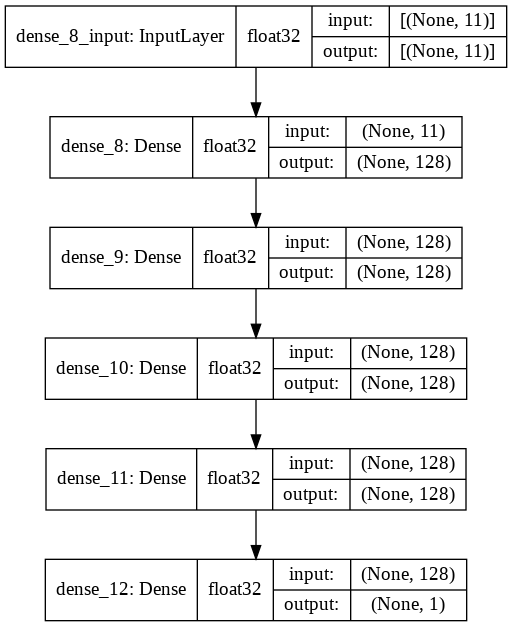

In [57]:
tf.keras.utils.plot_model(large_model, 'multilayer_model.png', show_shapes=True, show_dtype=True, show_layer_names=True)

In [58]:
history_large = large_model.fit(
    x_train_new, 
    y_train,
    batch_size = 32, 
    epochs = 30,
    verbose = 1 , 
    validation_data =(x_val_new , y_val)
)

Epoch 1/30
124/124 [==============================] - 1s 3ms/step - loss: 4.6265 - mae: 1.5678 - val_loss: 1.4706 - val_mae: 1.0033
Epoch 2/30
124/124 [==============================] - 0s 2ms/step - loss: 1.0503 - mae: 0.7870 - val_loss: 0.6814 - val_mae: 0.6180
Epoch 3/30
124/124 [==============================] - 0s 2ms/step - loss: 0.6128 - mae: 0.6093 - val_loss: 0.6342 - val_mae: 0.6077
Epoch 4/30
124/124 [==============================] - 0s 2ms/step - loss: 0.5122 - mae: 0.5552 - val_loss: 0.6326 - val_mae: 0.6139
Epoch 5/30
124/124 [==============================] - 0s 2ms/step - loss: 0.4806 - mae: 0.5411 - val_loss: 0.5860 - val_mae: 0.5684
Epoch 6/30
124/124 [==============================] - 0s 2ms/step - loss: 0.4629 - mae: 0.5304 - val_loss: 0.5287 - val_mae: 0.5716
Epoch 7/30
124/124 [==============================] - 0s 3ms/step - loss: 0.4452 - mae: 0.5174 - val_loss: 0.5240 - val_mae: 0.5689
Epoch 8/30
124/124 [==============================] - 0s 2ms/step - loss: 0.

**Model Evaluation**

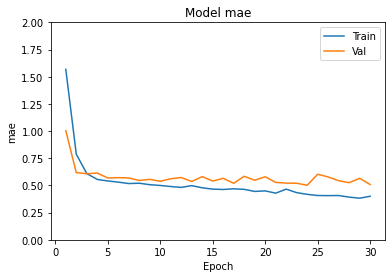

--------------------------------------------------------


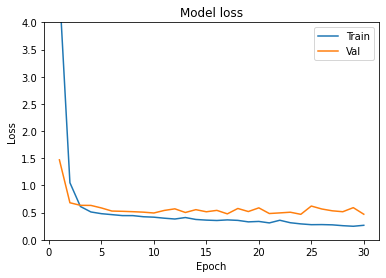

In [59]:
plot_learningCurve(history_large)

In [60]:
l_test_loss , l_test_mae = large_model.evaluate(
    x_test_new , 
    y_test ,
    batch_size = 32 , 
    verbose = 1
)

print("large model test_loss : {}".format(l_test_loss))
print("large model test_mae : {}".format(l_test_mae))

23/23 [==============================] - 0s 1ms/step - loss: 0.6168 - mae: 0.5650
large model test_loss : 0.6168100833892822
large model test_mae : 0.5650043487548828


In [61]:
y_large = large_model.predict(
    sc_x.transform(np.array([[6.0 , 0.28 , 0.22 , 12.15 ,0.048 , 42.0 , 163.0 ,0.99570 , 3.20 , 0.46 ,10.1]]))
)
print("Wine quality on unseen data (large model): ", y_large[0][0])

Wine quality on unseen data (large model):  5.60096


**Fixing Overfitting**

*Adding Dropout Layers*


In [62]:
large_model_overfit = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(128 , activation = 'relu' ,input_shape = (11, )),
     tf.keras.layers.Dropout(0.4),
     tf.keras.layers.Dense(128 , activation = 'relu'),
     tf.keras.layers.Dropout(0.3),
     tf.keras.layers.Dense(128 , activation = 'relu'),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(128 , activation = 'relu'),
     tf.keras.layers.Dense(1)
     ]
)

In [63]:
large_model_overfit.compile(loss = 'mse' ,optimizer = 'adam' , metrics = ['mae'])

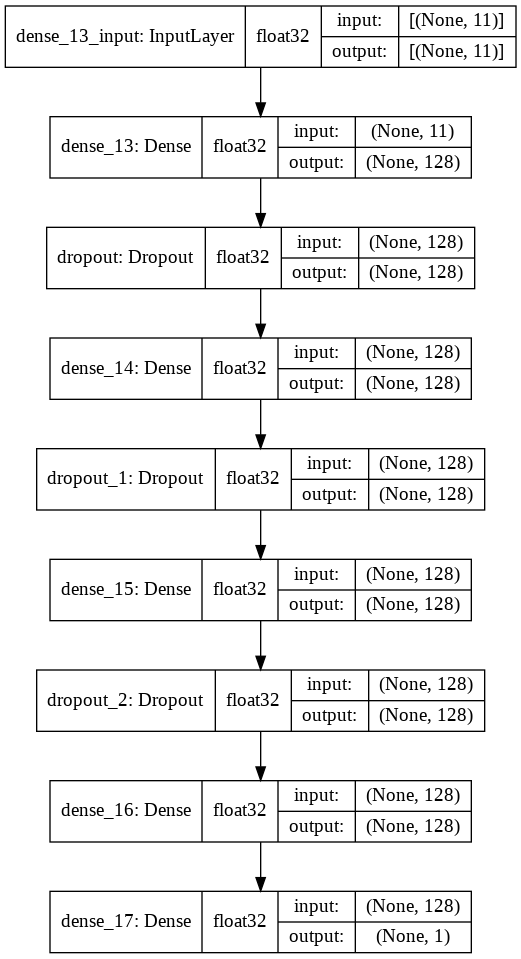

In [64]:
tf.keras.utils.plot_model(large_model_overfit, 'multilayer_model.png', show_shapes=True, show_dtype=True, show_layer_names=True)

In [65]:
history_large_overfit = large_model_overfit.fit(
    x_train_new , 
    y_train , 
    batch_size = 32,
    epochs = 30,
    verbose = 0 , 
    validation_data =(x_val_new , y_val)
)

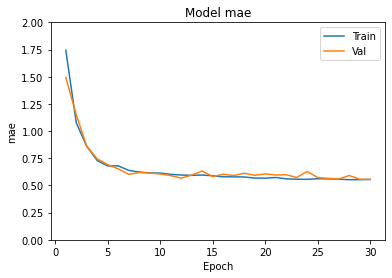

--------------------------------------------------------


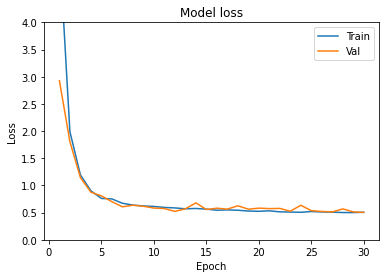

In [66]:
plot_learningCurve(history_large_overfit)

**Using RMSprop Optimization**

In [67]:
model_small = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(16 ,activation = 'relu' ,input_shape = (11 , )),
     tf.keras.layers.Dense(1)
     ]
)

In [68]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

In [69]:
model_small.compile(loss = 'mse' , optimizer = optimizer , metrics = ['mae'])

In [70]:
history_small_overfit = model_small.fit(
    x_train_new , 
    y_train , 
    batch_size = 32,
    epochs = 30, 
    verbose = 0,
    validation_data =(x_val_new , y_val)
)

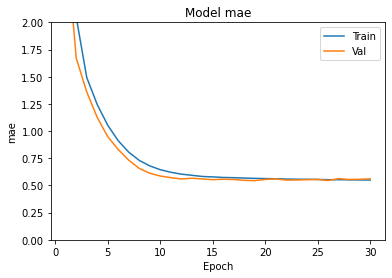

--------------------------------------------------------


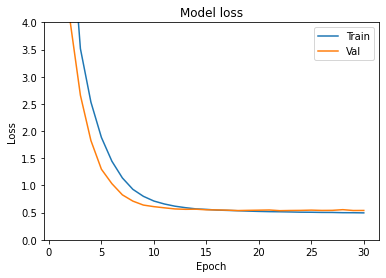

In [71]:
plot_learningCurve(history_small_overfit)

Trainable Parameters

In [73]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model_small.trainable_weights])
nonTrainableParams = np.sum([np.prod(v.get_shape()) for v in model_small.non_trainable_weights])
totalParams = trainableParams + nonTrainableParams
 
print('trainableParams:', trainableParams)
print('nonTrainableParams', nonTrainableParams)
print('totalParams', totalParams)

trainableParams: 209
nonTrainableParams 0.0
totalParams 209.0


In [74]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in large_model.trainable_weights])
nonTrainableParams = np.sum([np.prod(v.get_shape()) for v in large_model.non_trainable_weights])
totalParams = trainableParams + nonTrainableParams
 
print('trainableParams:', trainableParams)
print('nonTrainableParams', nonTrainableParams)
print('totalParams', totalParams)

trainableParams: 51201
nonTrainableParams 0.0
totalParams 51201.0


In [75]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in medium_model.trainable_weights])
nonTrainableParams = np.sum([np.prod(v.get_shape()) for v in medium_model.non_trainable_weights])
totalParams = trainableParams + nonTrainableParams
 
print('trainableParams:', trainableParams)
print('nonTrainableParams', nonTrainableParams)
print('totalParams', totalParams)

trainableParams: 9153
nonTrainableParams 0.0
totalParams 9153.0
